# Bias-Variance Decomposition

In the following equations, $x_0$ is a point in the testing set, while $\hat{y_0}$ is the prediction given by the model trained with the training set $D$. The Mean Square Error refers to the average square distance between the prediction $y_0$ and the real value $f(x_0)$, through different training sets drawn from the same sample distribution.

Under this assumptions, an important observation is that $f(x_0)$ is a constant with respect to $D$.

Having said that, the MSE can be decomposed as it follows:

$$
\begin{align}
MSE (x_0) & = E_D[f(x_0) - \hat{y_0}]^2 \\
& = E_D[(f(x_0) - E_D[\hat{y_0}]) + (E_D[\hat{y_0}] - \hat{y_0})]^2 \\
& = E_D[(f(x_0) - E_D[\hat{y_0}])^2 + 2(f(x_0) - E_D[\hat{y_0}])(E_D[\hat{y_0}] - \hat{y_0}) + (E_D[\hat{y_0}] - \hat{y_0})^2 ] \\
& =  E_D\big[f(x_0) - E_D[\hat{y_0}]\big]^2 + E_D\big[2(f(x_0) - E_D[\hat{y_0}])(E_D[\hat{y_0}] - \hat{y_0})\big] + E_D\big[E_D[\hat{y_0}] - \hat{y_0}\big]^2 \\
& =  E_D\big[f(x_0) - E_D[\hat{y_0}]\big]^2 + 2(f(x_0) - E_D[\hat{y_0}])E_D\big[(E_D[\hat{y_0}] - \hat{y_0})\big] + E_D\big[E_D[\hat{y_0}] - \hat{y_0}\big]^2 \\
& =  E_D\big[f(x_0) - E_D[\hat{y_0}]\big]^2 + 2(f(x_0) - E_D[\hat{y_0}])(E_D[\hat{y_0}] - E_D[\hat{y_0}]) + E_D\big[E_D[\hat{y_0}] - \hat{y_0}\big]^2 \\
& =  E_D\big[f(x_0) - E_D[\hat{y_0}]\big]^2 + E_D\big[E_D[\hat{y_0}] - \hat{y_0}\big]^2 \\
& =  \underbrace{(f(x_0) - E_D[\hat{y_0}])^2}_{bias^2} + \underbrace{E_D\big[E_D[\hat{y_0}] - \hat{y_0}\big]^2}_{variance}
\end{align}
$$

In the next setup, we will use a simple regression model based on KNN to predict the value of the following function,

$$
f(x) = e^{-8||x||^2}
$$

drawing samples from a uniform distribution between $-1$ and $1$ to conform the training set $D$.


Next, the $MSE$ will be computed with respect to the origin $x_0$. Also it will be generalized and compared with a sample space of higher dimensions.

In [241]:
import numpy as np
from matplotlib import pyplot as plt

In [246]:
def f(x):
    return np.exp(-8*np.linalg.norm(x)**2)

In [247]:
x = np.linspace(-1, 1, 1000)

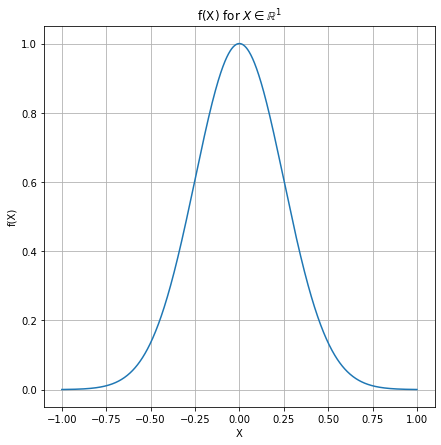

In [256]:
plt.figure(figsize=(7, 7))

plt.plot(x, [f(x) for x in x])

plt.title("f(X) for $X \in \mathbb{R}^1$")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.grid()
plt.show()

First, we define the regression function according to the one nearest neighbor criterion:

In [245]:
def one_nearest_neighbor_estimation(x, samples):
    """
    This function returns f(nearest_neighbor(x))
    """
    
    sqr_distances = (np.abs(x - samples)**2).sum(axis=1)
    idx_min = np.argmin(sqr_distances)
    nearest = samples[idx_min]
    
    y_hat = f(nearest) 
    
    return y_hat

Now, we take random samples from a uniform distribution between -1 and 1. Next, we will test the prediction for $x_0$, with diferent samples from the same distribution as the training set.

In [257]:
def sample(n_samples_per_dimension, dimension):
    
    samples = []
    for i in range(dimension):
        samples.append(np.random.uniform(-1, 1, n_samples_per_dimension))

    samples = np.array(samples).T
    
    return samples

In [206]:
samples = sample(100,  dimension=1)

In [207]:
n_experiments = 1000

y0_hats = []
for i in range(n_experiments):
    
    y0_hat = one_nearest_neighbor_estimation(np.zeros(samples.shape[1]), samples)
    y0_hats.append(y0_hat)
    
y0_hats = np.array(y0_hats)

Because $x_0$ is a global maximum of $f(x)$, the nearest neighbor regression will allways underestimate the true value, that corresponds to $y(x_0) = 1$.

$$E[\hat{y_0}] =\  ...$$

In [208]:
y0_hats.mean()

0.9999639670685778

Also, we can find the following relations with respect to the dimensionality of the sample space:

In [258]:
def experiment(n_samples, dimension):
    
    n_experiments = 1000

    y0_hats = []
    for i in range(n_experiments):

        samples = sample(n_samples, dimension)
        
        y0_hat = one_nearest_neighbor_estimation(np.zeros(dimension), samples)
        y0_hats.append(y0_hat)

    y0_hats = np.array(y0_hats)
    
    return y0_hats

In [259]:
dimensions = np.arange(1, 11)
y0_hats = np.array([experiment(100, d) for d in dimensions])
y0_hats.shape

(10, 1000)

In [260]:
y0_hats_means = y0_hats.mean(axis=1)
y0_hats_means.shape

(10,)

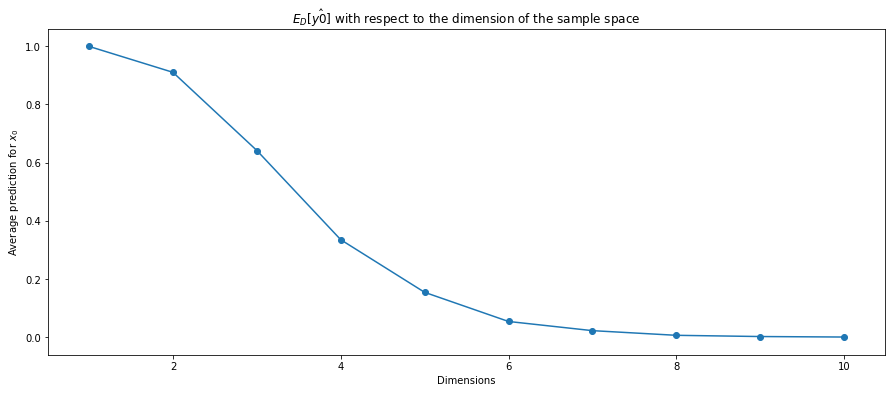

In [264]:
plt.figure(figsize=(15, 6))

plt.plot(np.arange(1, 11), y0_hats_means)
plt.scatter(np.arange(1, 11), y0_hats_means)

plt.title("$E_D[\hat{y0}]$ with respect to the dimension of the sample space")
plt.xlabel("Dimensions")
plt.ylabel("Average prediction for $x_0$")
plt.show()

In [265]:
def variance(predictions):    
    return ((predictions.mean() - predictions)**2).mean()

def bias_sqr(predictions, true_value):
    return ((predictions.mean() - true_value)**2).mean()

In [266]:
variances = np.array([variance(experiment(100, d)) for d in dimensions])
variances

array([7.36942528e-06, 7.46906509e-03, 3.64294721e-02, 3.65306401e-02,
       1.99165441e-02, 6.58177521e-03, 2.28504124e-03, 4.32356089e-04,
       1.31074680e-04, 4.09441180e-05])

In [267]:
sq_biases = np.array([bias_sqr(experiment(100, d), 1) for d in dimensions])
sq_biases

array([2.58958778e-06, 8.32122987e-03, 1.32982262e-01, 4.36607978e-01,
       7.30341879e-01, 8.81342198e-01, 9.59617563e-01, 9.85195933e-01,
       9.95282632e-01, 9.98412308e-01])

In [268]:
mse = sq_biases + variances

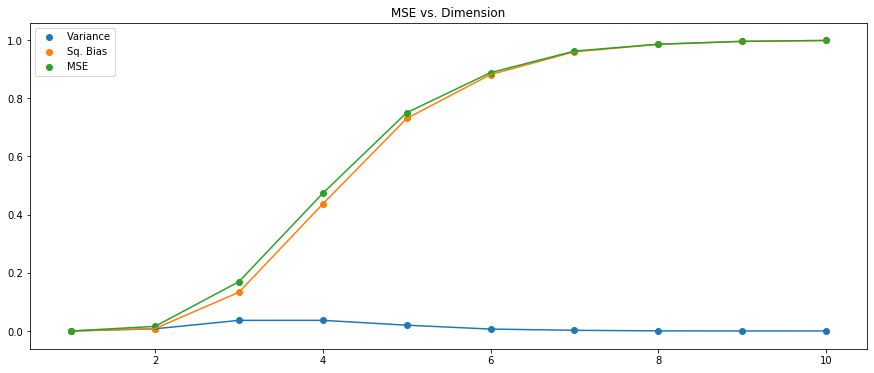

In [269]:
plt.figure(figsize=(15, 6))

plt.plot(np.arange(1, 11), variances)
plt.scatter(np.arange(1, 11), variances, label="Variance")

plt.plot(np.arange(1, 11), sq_biases)
plt.scatter(np.arange(1, 11), sq_biases, label="Sq. Bias")

plt.plot(np.arange(1, 11), mse)
plt.scatter(np.arange(1, 11), mse, label="MSE")

plt.title("MSE vs. Dimension")
plt.legend()
plt.show()

Identical plot can be found on page 25 of ESL, reference [1].

The fact that the MSE converges rapidly to 1 as the dimension grows means that the total volume that contains the high values of $f(x)$ starts relatively to shrink, resembling a singularity on the long term where all samples $x_i$ will correspond to $f(x_i) = 0$, unless $x_i = x_0 = 0$.

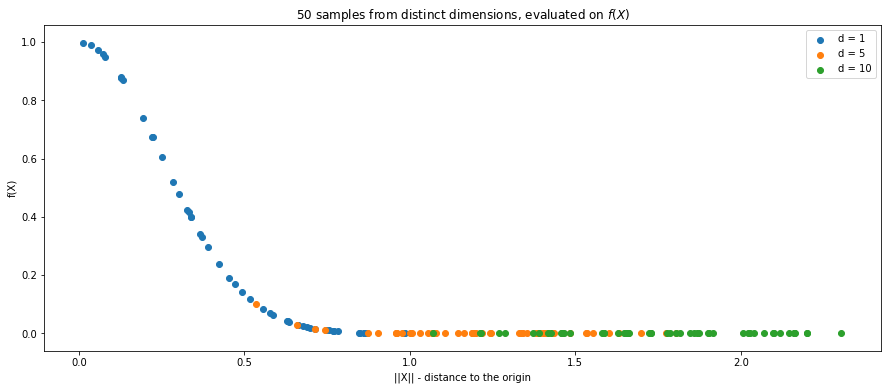

In [240]:
x1 = sample(50, 1)
x2 = sample(50, 5)
x3 = sample(50, 10)

x1_abs = np.array([np.linalg.norm(x) for x in x1])
x2_abs = np.array([np.linalg.norm(x) for x in x2])
x3_abs = np.array([np.linalg.norm(x) for x in x3])

plt.figure(figsize=(15, 6))

plt.scatter(x1_abs, [f(x) for x in x1_abs], label="d = 1")
plt.scatter(x2_abs, [f(x) for x in x2_abs], label="d = 5")
plt.scatter(x3_abs, [f(x) for x in x3_abs], label="d = 10")

plt.title("50 samples from distinct dimensions, evaluated on $f(X)$")
plt.ylabel("f(X)")
plt.xlabel("||X|| - distance to the origin")
plt.legend()
plt.show()

It can be seen that as the dimension grows, the samples starts to get away from the peak of the function.

# References

[1] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer Science & Business Media. Chapter 2.